# **Progetto di Digital Signal & Image Management**

## **Parte 1 - Audio recognition - DEMO**


*2020/2021*

Peracchi Marco 800578

Uccheddu Christian 800428

In [1]:
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import sounddevice as sd

import matplotlib.pyplot as plt

import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import mobilenet
from sklearn.linear_model import LogisticRegression

In [2]:
duration = 7 # (seconds)
rec_rate = 48000
signal = sd.rec(int(duration * rec_rate), samplerate=rec_rate, channels=1, blocking=True)

In [3]:
ipd.Audio(signal[:,0], rate=rec_rate)

C:\Users\Marco\.conda\envs\machinelearning\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Marco\.conda\envs\machinelearning\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


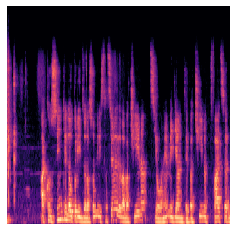

In [4]:
spect = librosa.feature.melspectrogram(y=signal[:,0], n_mels=128)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
S_dB = librosa.power_to_db(spect, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', ax=ax)
fig.savefig("single/test/"+"demo.png", dpi = 100)

In [5]:
single_processing = keras.preprocessing.image.ImageDataGenerator(preprocessing_function= mobilenet.preprocess_input)

single_generator = single_processing.flow_from_directory("single",
                                    target_size = (224, 224),
                                    color_mode = "rgb",
                                    batch_size = 1,
                                    class_mode = "categorical",
                                    shuffle = False,
                                    seed = 1)
test,label_test = next(single_generator)

Found 1 images belonging to 1 classes.


In [6]:
model_1 = tf.keras.models.load_model('modello_audio')
loaded_model = pickle.load(open("logistic_audio.sav", 'rb'))

C:\Users\Marco\.conda\envs\machinelearning\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [7]:
test_features = model_1.predict(test)
test_features = test_features.reshape(test_features.shape[0],
                                      test_features.shape[1]*test_features.shape[2]*test_features.shape[3])
pred_finali = loaded_model.predict(test_features)

In [8]:
labels = {"Improvvisato": 0, "Letto" : 1}
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in pred_finali]

predictions

['Letto']